# An introduction of Morlet wavelet

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pywt
from scipy.signal import chirp, spectrogram
from rich.console import Console

from StoSpecRep.waveletEPSD import CWTx
from StoSpecRep.utils import save2Vis
console = Console()

In [3]:
%matplotlib widget

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# set up a global plt style for the script
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        })

### The expression for a Morlet wavelet:

$$\Psi(t) = \exp^{-\frac{t^{2}}{2}} \cos (5t)$$


The center frequency is: $5/2\pi \approx 0.8$ (Hz)

The Morlet wavelet has the interval [-4, 4] as effective support. Nearly 100% of the wavelet's energy is in the interval. Although [-4, 4] is the correct theoretical effective support, a wider effective support, [-8, 8], is used in the computation to provide more accurate results.


####  scale to frequency

The scale factor is inversely proportional to frequency, a constant proportionality called center frequency of the wavelet.
It can be better shown in equations:

$$
F_{eq} = \frac{C_{f}}{s \delta t}
$$

where

- $F_{eq}$ is the equivalent frequency;
- $C_{f}$ is the center frequency of the wavelet;
- $s$ is the scale;
- $\delta t$ is the sampling interval

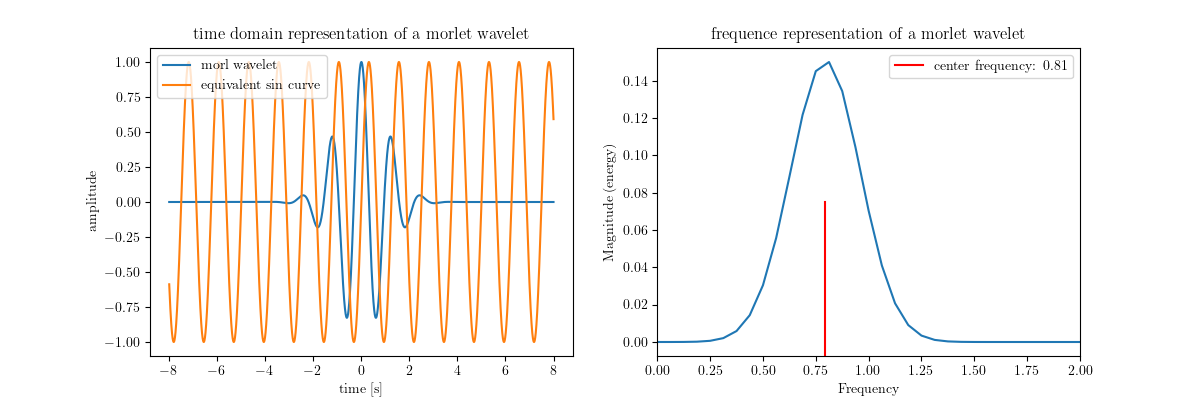

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# another example from Youtube
fs = 1000
t = np.arange(-8, 8, 1/fs)
y = np.exp(-(t**2/2)) * np.cos(5*t)

# compute the central frequency of the wavelet 
ct = pywt.central_frequency("morl", precision=8)

ax0.plot(t, y, label='morl wavelet')
ax0.set_title('time domain representation of a morlet wavelet')
ax0.plot(t, np.sin(2*np.pi* 0.8*t), label='equivalent sin curve')
ax0.set_xlabel('time [s]')
ax0.set_ylabel('amplitude')
ax0.legend()

ax1.magnitude_spectrum(y, fs)
ax1.set_title('frequence representation of a morlet wavelet')
ax1.axvline(x=5/(2*np.pi), ymin=0, ymax=0.5, color='red', label=f'center frequency: {ct:.2f}') 
ax1.set_xlim([0, 2])
ax1.legend()

plt.show()

In [8]:
# save2Vis('morletWavelet_illustration')

#### The relation between `frequency` and `scale`

> *based on the example from [Pywavelet](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)*

- **coefs**: The first axis of coefs corresponds to the scales. The remaining axes match the shape of data.
- **frequencies**: If the unit of sampling period are seconds and given, than frequencies are in hertz. Otherwise, a sampling period of 1 is assumed.

In [9]:
def scale2freq(scales, dt):
    """ a direct func to get frequency values in Hertz
    Due to the base function has weird units;
    """
    
    freq_hz = pywt.scale2frequency(wavelet='morl', scale=scales)  / dt
    return freq_hz

In [10]:
def freq2scale(freqs, dt):
    """ input frequency output scales """
    
    freqs = freqs * dt
    return pywt.frequency2scale('morl', freqs)

### The use of Wavelet transform (morlet wavelet `'morl'`)

In [11]:
test_dt =0.01

In [12]:
# value1 = scale2freq(test_scales, test_dt)
# value1

In [13]:
# value2 = pywt.central_frequency("morl", precision=8) / (test_scales * test_dt)
# value2

In [14]:
# np.isclose(value1, value2)

In [15]:
linear_range_scales = np.linspace(4, 128, num=20, endpoint=True)

# for example, use base=2
exp_range_scales = np.logspace(start=2,  stop=7, num=20, base=2, endpoint=True)

In [22]:
# console.print("the linear scaled scales: \n", linear_range_scales)

the linear scaled scales: 
 [  4.          10.52631579  17.05263158  23.57894737  30.10526316
  36.63157895  43.15789474  49.68421053  56.21052632  62.73684211
  69.26315789  75.78947368  82.31578947  88.84210526  95.36842105
 101.89473684 108.42105263 114.94736842 121.47368421 128.        ]

In [23]:
# console.print("the exponential scaled scales: \n", exp_range_scales)

the exponential scaled scales: 
 [  4.           4.80041088   5.76098615   6.91377515   8.29724036
   9.95754072  11.95007169  14.34131354  17.21104938  20.65502717
  24.78815428  29.74833136  35.70105337  42.84493124  51.4183185
  61.70726387  74.05505519  88.87367313 106.65753682 128.        ]

In [18]:
# computed frequencies
linear_freqs = scale2freq(linear_range_scales, test_dt)
exp_freqs = scale2freq(exp_range_scales, test_dt)

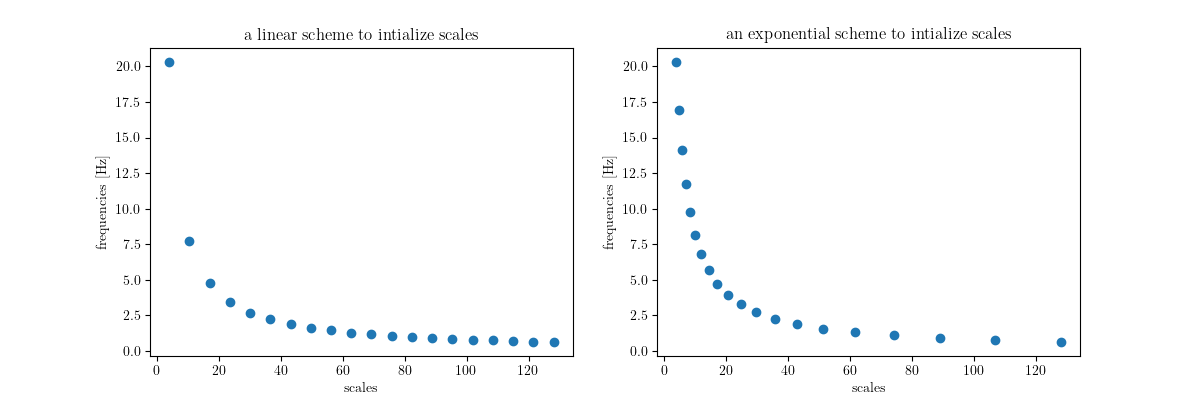

In [21]:
# plotting
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax0.plot(linear_range_scales, linear_freqs, 'o')
ax0.set_xlabel('scales')
ax0.set_ylabel('frequencies [Hz]')
ax0.set_title('a linear scheme to intialize scales')

ax1.plot(exp_range_scales, exp_freqs, 'o')
ax1.set_xlabel('scales')
ax1.set_ylabel('frequencies [Hz]')
ax1.set_title('an exponential scheme to intialize scales')

plt.show()

### Some general scales

This gives user a hint about which scale to choose from

In [50]:
# goto_scales = np.arange(2, 33)

# a `goto_scale` will be a=2, b=7
goto_scales = np.logspace(start=2, stop=10, num=30,  base=2, endpoint=True)

In [51]:
# goto_scales

In [52]:
demo_freq_range = scale2freq(goto_scales, dt=0.01)
# demo_freq_range

In [53]:
dt_list = [0.005, 0.01, 0.02]

In [54]:
freq_lists = (scale2freq(goto_scales, x) for x in dt_list)
fs_list = [1/x for x in dt_list]

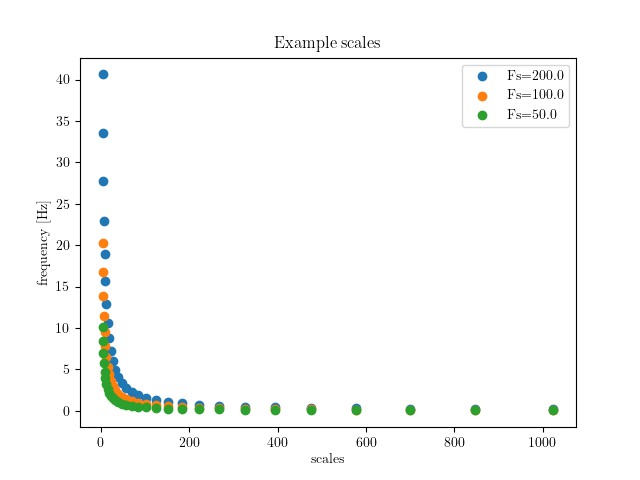

In [55]:
fig = plt.figure()
for freq, fs in zip(freq_lists, fs_list):
    plt.scatter(goto_scales, freq, label =f'Fs={fs}')

plt.xlabel('scales')
plt.ylabel('frequency [Hz]')
plt.title('Example scales')
plt.legend()
plt.show()